# Small mobile-env test notebook

Use a predefined mobile-env environment with a random agent.

In [6]:
# predefined small scenarios
from mobile_env.scenarios.small import MComSmall

# easy access to the default configuration
MComSmall.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 0,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.ResourceFair,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'handler': mobile_env.handlers.central.MComCentralHandler,
 'bs': {'bw': 9000000.0, 'freq': 2500, 'tx': 30, 'height': 50},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'arrival_params': {'ep_time': 100, 'reset_rng_episode': False},
 'channel_params': {},
 'scheduler_params': {},
 'movement_params': {'width': 200, 'height': 200, 'reset_rng_episode': False},
 'utility_params': {'lower': -20, 'upper': 20, 'coeffs': (10, 0, 10)},
 'metrics': {'scalar_metrics': {}, 'ue_metrics': {}, 'bs_metrics': {}}}

In [1]:
import gymnasium
import matplotlib.pyplot as plt
# importing mobile_env automatically registers the predefined scenarios in Gymnasium
import mobile_env

# create a small mobile environment for a single, centralized control agent
env = gymnasium.make("mobile-small-central-v0", render_mode='rgb_array')
env.reset()

# select a random action: control cell connections for each UE
random_action = env.action_space.sample()
random_action

array([3, 3, 3, 2, 2], dtype=int64)

In [8]:
# apply random action to environment to run one step
# note the changed step() API with gym v26+/gymnasium: https://gymnasium.farama.org/content/migration-guide/
obs, reward, terminated, truncated, info = env.step(random_action)
obs, reward, terminated, truncated, info

(array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.2516919 ,
         0.56135505, -1.        ,  0.        ,  0.        ,  0.        ,
         0.11989262,  0.1122832 ,  1.        , -1.        ,  0.        ,
         1.        ,  0.        ,  0.4710008 ,  0.44577658,  1.        ,
        -0.14339764,  0.        ,  0.        ,  0.        ,  0.03805785,
         0.04028227,  1.        , -1.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.17299446,  0.3024028 , -0.2793635 ],
       dtype=float32),
 -0.6845522348831917,
 False,
 False,
 {'number connections': 2,
  'number connected': 2,
  'mean utility': -0.6845522348831917,
  'mean datarate': 0.39644558870552443})

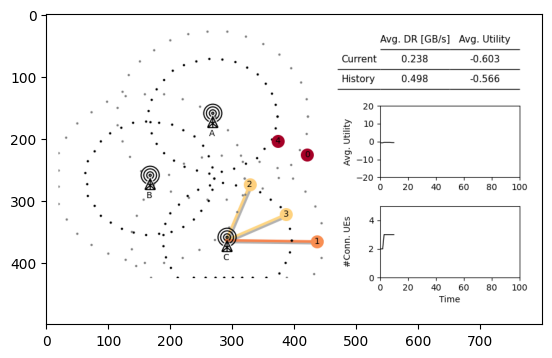

In [9]:
from IPython import display

# run for 10 steps with random actions, rendering the env
for _ in range(10):
    random_action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(random_action)

    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)